## Import dependencies

In [54]:
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(style='ticks',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Read csv

In [4]:
df = pd.read_csv("data/cfb_attendance.csv", encoding = "cp1252")
df

,Date,Team,Time,Opponent,Rank,Site,TV,Result,Attendance,Current Wins,...,PRCP,SNOW,SNWD,TMAX,TMIN,Opponent_Rank,Conference,Year,Month,Day
0,4/9/2011,Middle Tennessee,1:00 PM,Blue-White Spring Game,NR,"Johnny ""Red"" Floyd StadiumMurfreesboro, TN",Not on TV,Blue 67-60,3409,0,...,0.00,0.0,0.0,84,59,NR,Sun Belt,2011,4,9
1,11/20/2010,Iowa State,6:00 PM,No. 15 Missouri,NR,"Jack Trice StadiumAmes, IA (Battle for the Tel...",FSN,L 0-14,41776,5,...,0.00,0.0,0.0,38,24,15,Big-12,2010,11,20
2,9/18/2015,Boston College,8:00 PM,No. 9 Florida State,NR,"Alumni StadiumChestnut Hill, MA",ESPN,L 0-14,39111,2,...,0.00,0.0,0.0,87,64,9,ACC,2015,9,18
3,9/21/2013,Miami (OH),4:00 PM,Cincinnati*,NR,"Yager StadiumOxford, OH (118th Battle for the ...",ESPN3,L 0-14,21586,0,...,0.38,0.0,0.0,75,51,NR,Mid-American,2013,9,21
4,11/29/2008,UCF,1:00 PM,UAB,NR,"Bright House Networks StadiumOrlando, FL",Not on TV,L 0-15,23644,4,...,0.00,0.0,0.0,79,48,NR,CUSA,2008,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,11/20/2010,Texas A&M,7:00 PM,No. 9 Nebraska,18,"Kyle FieldCollege Station, TX",ABC,W 9-6,90079,7,...,0.00,0.0,0.0,77,50,9,Big-12,2010,11,20
6668,9/19/2015,Missouri,11:00 AM,UConn*,22,"Faurot FieldColumbia, MO",ESPN,W 9-6,70079,2,...,0.00,0.0,0.0,74,55,NR,SEC,2015,9,19
6669,4/18/2009,Middle Tennessee,1:00 PM,Blue Vs. White Spring Game,NR,"Johnny ""Red"" Floyd StadiumMurfreesboro, Tennessee",Not on TV,W White 35-17,2518,0,...,0.00,0.0,0.0,77,40,NR,Sun Belt,2009,4,18
6670,4/14/2012,Middle Tennessee,1:00 PM,Blue-White Spring Game,NR,"Johnny ""Red"" Floyd StadiumMurfreesboro, TN",Not on TV,White 40-17,4214,0,...,0.00,0.0,0.0,73,37,NR,Sun Belt,2012,4,14


## Cleaning the data

In [5]:
#Identify any missing data
df.isna().any()

Date                False
Team                False
Time                False
Opponent            False
Rank                False
Site                False
TV                  False
Result              False
Attendance          False
Current Wins        False
Current Losses      False
Stadium Capacity    False
Fill Rate           False
New Coach           False
Tailgating          False
PRCP                False
SNOW                False
SNWD                False
TMAX                False
TMIN                False
Opponent_Rank       False
Conference          False
Year                False
Month               False
Day                 False
dtype: bool

In [6]:
#Check type of each column
df.dtypes

Date                 object
Team                 object
Time                 object
Opponent             object
Rank                 object
Site                 object
TV                   object
Result               object
Attendance            int64
Current Wins          int64
Current Losses        int64
Stadium Capacity      int64
Fill Rate           float64
New Coach              bool
Tailgating             bool
PRCP                float64
SNOW                float64
SNWD                float64
TMAX                  int64
TMIN                  int64
Opponent_Rank        object
Conference           object
Year                  int64
Month                 int64
Day                   int64
dtype: object

In [7]:
# Cast column ['Result'] to a string in order to parse out text
# Cast column ['Conference'] as string
# Cast column ['Fill Rate'] as float64

df = df.astype({'Result': 'string'})
df = df.astype({'Fill Rate': 'float64'})
df = df.astype({'Conference': 'string'})

In [8]:
# Remove rows that include Spring Games, OT, NC, Vacated or with any other special characters in the Results column

df = df[df["Result"].str.contains("Blue") == False]
df = df[df["Result"].str.contains("White") == False]
df = df[df["Result"].str.contains("NC") == False]
df = df[df["Result"].str.contains("OT") == False]
df = df[df["Result"].str.contains("vacated") == False]
df = df[df["Result"].str.contains('\[') == False]
df = df[df["Result"].str.contains('\(') == False]
df = df[df["Result"].str.contains('\‡') == False]
df = df[df["Result"].str.contains('A') == False]

In [9]:
# Parse out Results column to 'W/L', 'Score', 'Home Score', 'Away Score'

df['W/L'] = df['Result'].str.split(' ', expand=True)[0]
df['Score'] = df['Result'].str.split(' ', expand=True)[1]
df['Home Score'] = df['Score'].str.split('-', expand=True)[0]
df['Away Score'] = df['Score'].str.split('-', expand=True)[1]

In [10]:
# Check for any additional special characters

df['Away Score'].unique()

<StringArray>
['14', '15', '16', '17', '19', '20', '23', '24', '26', '27', '28',  '3', '30',
 '31', '34', '35', '37', '38', '39', '40', '41', '42', '44', '45', '48', '49',
 '50', '52', '55', '56', '62', '63', '64', '78', '11', '13', '18', '21', '29',
 '33', '36', '47', '54', '59', '12', '22', '32', '58', '43', '51', '53', '61',
 '66', '46', '57', '65', '25', '69', '68', '10', '75', '60',  '6',  '7',  '9',
  '0',  '8',  '2',  '5']
Length: 69, dtype: string

In [11]:
# Change Home Score and Away Score to integers

df = df.astype({'Home Score': 'int64'})
df = df.astype({'Away Score': 'int64'})
df.dtypes

Date                 object
Team                 object
Time                 object
Opponent             object
Rank                 object
Site                 object
TV                   object
Result               string
Attendance            int64
Current Wins          int64
Current Losses        int64
Stadium Capacity      int64
Fill Rate           float64
New Coach              bool
Tailgating             bool
PRCP                float64
SNOW                float64
SNWD                float64
TMAX                  int64
TMIN                  int64
Opponent_Rank        object
Conference           string
Year                  int64
Month                 int64
Day                   int64
W/L                  string
Score                string
Home Score            int64
Away Score            int64
dtype: object

In [12]:
# Add Total Score column by adding up Home Score + Away Score

tscore = df["Home Score"] + df["Away Score"]
df["Total Score"] = tscore
df

,Date,Team,Time,Opponent,Rank,Site,TV,Result,Attendance,Current Wins,...,Opponent_Rank,Conference,Year,Month,Day,W/L,Score,Home Score,Away Score,Total Score
1,11/20/2010,Iowa State,6:00 PM,No. 15 Missouri,NR,"Jack Trice StadiumAmes, IA (Battle for the Tel...",FSN,L 0-14,41776,5,...,15,Big-12,2010,11,20,L,0-14,0,14,14
2,9/18/2015,Boston College,8:00 PM,No. 9 Florida State,NR,"Alumni StadiumChestnut Hill, MA",ESPN,L 0-14,39111,2,...,9,ACC,2015,9,18,L,0-14,0,14,14
3,9/21/2013,Miami (OH),4:00 PM,Cincinnati*,NR,"Yager StadiumOxford, OH (118th Battle for the ...",ESPN3,L 0-14,21586,0,...,NR,Mid-American,2013,9,21,L,0-14,0,14,14
4,11/29/2008,UCF,1:00 PM,UAB,NR,"Bright House Networks StadiumOrlando, FL",Not on TV,L 0-15,23644,4,...,NR,CUSA,2008,11,29,L,0-15,0,15,15
5,11/25/2008,Northern Illinois,6:00 PM,Navy*,NR,"Huskie StadiumDeKalb, IL",ESPNC,L 0-16,17950,6,...,NR,Mid-American,2008,11,25,L,0-16,0,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,11/22/2016,Ohio,7:00 PM,Akron,NR,"Peden StadiumAthens, OH",ESPNU,W 9-3,18025,7,...,NR,Mid-American,2016,11,22,W,9-3,9,3,12
6663,9/8/2012,South Alabama,4:00 PM,Nicholls State*,NR,"Ladd-Peebles StadiumMobile, AL",ESPN3,W 9-3,15237,0,...,NR,FCS,2012,9,8,W,9-3,9,3,12
6666,11/17/2018,Nebraska,11:00 AM,Michigan State,NR,"Memorial StadiumLincoln, NE",FOX,W 9-6,88793,3,...,NR,Big-10,2018,11,17,W,9-6,9,6,15
6667,11/20/2010,Texas A&M,7:00 PM,No. 9 Nebraska,18,"Kyle FieldCollege Station, TX",ABC,W 9-6,90079,7,...,9,Big-12,2010,11,20,W,9-6,9,6,15


## Q1. Does attendance/fill rate affect home team winning

In [13]:
df_1 = df[['Attendance', 'Stadium Capacity', 'Fill Rate', 'Conference', 'W/L']]
df_1

,Attendance,Stadium Capacity,Fill Rate,Conference,W/L
1,41776,55000,0.759564,Big-12,L
2,39111,44500,0.878899,ACC,L
3,21586,24286,0.888825,Mid-American,L
4,23644,45323,0.521678,CUSA,L
5,17950,24000,0.747917,Mid-American,L
...,...,...,...,...,...
6662,18025,24000,0.751042,Mid-American,W
6663,15237,40000,0.380925,FCS,W
6666,88793,85458,1.039025,Big-10,W
6667,90079,83002,1.085263,Big-12,W


In [15]:
# Identify range of fill rate in data set
df_1['Fill Rate'].describe()

count    6307.000000
mean        0.792274
std         0.221476
min         0.067483
25%         0.642849
50%         0.844705
75%         0.988986
max         1.403993
Name: Fill Rate, dtype: float64

In [89]:
# Create bins and groups
bins = [0.0, .20, .40, .60, .80, 1.0, 1.5]
group_names = ["0%-20%", "21%-40%", "41%-60%", "61%-80%", "81%-100%"," Over 100%"]

In [90]:
df_1["Fill Rate Grouping"] = pd.cut(df_1["Fill Rate"], bins, labels = group_names)
df_1

C:\Users\jimst\AppData\Local\Temp/ipykernel_21088/2509881243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Fill Rate Grouping"] = pd.cut(df_1["Fill Rate"], bins, labels = group_names)


,Attendance,Stadium Capacity,Fill Rate,Conference,W/L,Fill Rate Grouping
1,41776,55000,0.759564,Big-12,L,61%-80%
2,39111,44500,0.878899,ACC,L,81%-100%
3,21586,24286,0.888825,Mid-American,L,81%-100%
4,23644,45323,0.521678,CUSA,L,41%-60%
5,17950,24000,0.747917,Mid-American,L,61%-80%
...,...,...,...,...,...,...
6662,18025,24000,0.751042,Mid-American,W,61%-80%
6663,15237,40000,0.380925,FCS,W,21%-40%
6666,88793,85458,1.039025,Big-10,W,Over 100%
6667,90079,83002,1.085263,Big-12,W,Over 100%


In [91]:
groupby_total = df_1.groupby(["Fill Rate Grouping"]).count()["Attendance"]
groupby_total

Fill Rate Grouping
0%-20%          63
21%-40%        343
41%-60%        903
61%-80%       1459
81%-100%      2464
 Over 100%    1075
Name: Attendance, dtype: int64

In [92]:
groupby_w = df_1.loc[df_1["W/L"] == "W"]
groupby_w

,Attendance,Stadium Capacity,Fill Rate,Conference,W/L,Fill Rate Grouping
2392,58200,57583,1.010715,ACC,W,Over 100%
2393,86115,81067,1.062269,Big-12,W,Over 100%
2394,22792,24286,0.938483,Mid-American,W,81%-100%
2395,21366,31218,0.684413,MWC,W,61%-80%
2396,43326,51500,0.841282,CUSA,W,81%-100%
...,...,...,...,...,...,...
6662,18025,24000,0.751042,Mid-American,W,61%-80%
6663,15237,40000,0.380925,FCS,W,21%-40%
6666,88793,85458,1.039025,Big-10,W,Over 100%
6667,90079,83002,1.085263,Big-12,W,Over 100%


In [93]:
groupby_w2 = groupby_w.groupby(["Fill Rate Grouping"]).count()["Attendance"]
groupby_w2

Fill Rate Grouping
0%-20%          24
21%-40%        176
41%-60%        520
61%-80%        923
81%-100%      1649
 Over 100%     748
Name: Attendance, dtype: int64

In [94]:
groupby_l = df_1.loc[df_1["W/L"] == "L"]
groupby_l

,Attendance,Stadium Capacity,Fill Rate,Conference,W/L,Fill Rate Grouping
1,41776,55000,0.759564,Big-12,L,61%-80%
2,39111,44500,0.878899,ACC,L,81%-100%
3,21586,24286,0.888825,Mid-American,L,81%-100%
4,23644,45323,0.521678,CUSA,L,41%-60%
5,17950,24000,0.747917,Mid-American,L,61%-80%
...,...,...,...,...,...,...
2386,21797,50000,0.435940,Big-12,L,41%-60%
2387,5127,25013,0.204973,Mid-American,L,21%-40%
2388,33428,49225,0.679086,Big-10,L,61%-80%
2389,28375,50000,0.567500,Big-12,L,41%-60%


In [95]:
groupby_l2 = groupby_l.groupby(["Fill Rate Grouping"]).count()["Attendance"]
groupby_l2

Fill Rate Grouping
0%-20%         39
21%-40%       167
41%-60%       383
61%-80%       536
81%-100%      815
 Over 100%    327
Name: Attendance, dtype: int64

In [96]:
graph_data = (groupby_w2 / groupby_total)*100
graph_data

Fill Rate Grouping
0%-20%        38.095238
21%-40%       51.311953
41%-60%       57.585825
61%-80%       63.262509
81%-100%      66.923701
 Over 100%    69.581395
Name: Attendance, dtype: float64

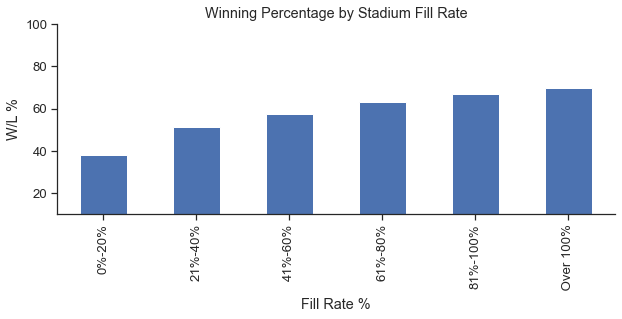

<Figure size 864x576 with 0 Axes>

In [97]:
question_one = graph_data.plot(kind="bar", title = "Winning Percentage by Stadium Fill Rate", figsize=(10,3.5))
question_one.set_ylabel("W/L %")
question_one.set_xlabel("Fill Rate %")
plt.ylim((10, 100))
plt.show()
plt.tight_layout()